<a href="https://colab.research.google.com/github/wzakrzewski/Zurich/blob/main/Projekt1_Wojciech_Zakrzewski.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Przygotowanie danych


Importujemy potrzebne biblioteki.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Ładujemy dane do pandas jako ramke danych.

In [ ]:
df = pd.read_csv('http://data.insideairbnb.com/switzerland/z%C3%BCrich/zurich/2023-09-24/data/listings.csv.gz')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2534 entries, 0 to 2533
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            2534 non-null   int64  
 1   listing_url                                   2534 non-null   object 
 2   scrape_id                                     2534 non-null   int64  
 3   last_scraped                                  2534 non-null   object 
 4   source                                        2534 non-null   object 
 5   name                                          2534 non-null   object 
 6   description                                   2489 non-null   object 
 7   neighborhood_overview                         1200 non-null   object 
 8   picture_url                                   2534 non-null   object 
 9   host_id                                       2534 non-null   i

In [ ]:
pd.set_option('display.max_columns', None)
df

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,73282,https://www.airbnb.com/rooms/73282,20230924051608,2023-09-24,previous scrape,Rental unit in Zurich · ★4.78 · 1 bedroom · 1 ...,Arty neighborhood<br /><br /><b>The space</b><...,NaN,https://a0.muscache.com/pictures/481072/abd94c...,377532,https://www.airbnb.com/users/show/377532,Simona,2011-02-04,"Zurich, Switzerland",I am from Italy and have lived in Zurich for a...,NaN,NaN,NaN,f,https://a0.muscache.com/im/users/377532/profil...,https://a0.muscache.com/im/users/377532/profil...,NaN,1,1,"['email', 'phone']",t,t,NaN,Sihlfeld,Kreis 3,47.37,8.52,Entire rental unit,Entire home/apt,4,NaN,1 bath,1.00,1.00,"[""Lake access"", ""Wifi"", ""Dryer"", ""TV with stan...",$100.00,1125,1125,1125,1125,1125,1125,1125.00,1125.00,NaN,t,23,53,83,358,2023-09-24,49,0,0,2012-05-19,2019-04-27,4.78,4.87,4.80,4.84,4.93,4.71,4.61,NaN,f,1,1,0,0,0.35
1,178448,https://www.airbnb.com/rooms/178448,20230924051608,2023-09-24,city scrape,Rental unit in Zurich · ★4.89 · 1 bedroom · 1 ...,"Very central location, 5 min walk from Bahnhof...","We live in one of the top locations of Zürich,...",https://a0.muscache.com/pictures/7d41e016-e818...,854016,https://www.airbnb.com/users/show/854016,Delphine,2011-07-22,"Zurich, Switzerland","I am a quiet, friendly and caring person\r\nI ...",NaN,NaN,NaN,f,https://a0.muscache.com/im/users/854016/profil...,https://a0.muscache.com/im/users/854016/profil...,NaN,1,1,"['email', 'phone']",t,f,"Zurich, Switzerland",Enge,Kreis 2,47.37,8.53,Private room in rental unit,Private room,1,NaN,1 bath,NaN,1.00,"[""Hangers"", ""Lake access"", ""Shampoo"", ""Wifi"", ...",$60.00,5,31,5,5,31,31,5.00,31.00,NaN,t,0,0,0,235,2023-09-24,9,0,0,2011-08-30,2016-05-10,4.89,4.89,4.89,4.89,4.89,5.00,4.89,NaN,f,1,0,1,0,0.06
2,204586,https://www.airbnb.com/rooms/204586,20230924051608,2023-09-24,city scrape,Rental unit in Zurich · 1 bedroom · 1 bed · 1 ...,<b>The space</b><br />share a room in a very n...,NaN,https://a0.muscache.com/pictures/55486203/9834...,1004816,https://www.airbnb.com/users/show/1004816,Aicha,2011-08-22,"Zurich, Switzerland","I'm a very active person, love traveling, cook...",NaN,NaN,100%,f,https://a0.muscache.com/im/users/1004816/profi...,https://a0.muscache.com/im/users/1004816/profi...,NaN,1,1,"['email', 'phone']",t,f,NaN,Höngg,Kreis 10,47.41,8.48,Private room in rental unit,Private room,1,NaN,1 shared bath,NaN,1.00,"[""Wifi"", ""Dryer"", ""TV with standard cable"", ""K...",$200.00,3,6,3,3,6,6,3.00,6.00,NaN,t,29,59,86,351,2023-09-24,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN
3,222565,https://www.airbnb.com/rooms/222565,20230924051608,2023-09-24,city scrape,Home in Zurich · ★4.60 · 1 bedroom · 1 bed · 1...,<b>The spa

**Oszacowanie czasu analizy:**
W powyższych danych są 74 kolumny. Na pierwszy rzut oka widać, że kilka z nich nie będzie przydatne do analizy. W kilku trzeba będzie lepiej sformatować dane, zamienić niektóre na dane kategoryczne etc. Pojawiają się też kolumny ze znaczną ilością brakujących wartości. Trzeba więc będzie zastanowić się co z takimi kolumnami zrobić. Najprawdopodobniej, niektóre kolumny będą do usunięcia, a w innych trzeba będzie zastanowić się nad odpowiednią metodą uzupełnienia danych brakujących.

Oceniam, że przygotowanie danych i ich analiza - stosując się do każdego z wymagań projektu - może zająć około 10 godzin.

In [ ]:
df['scrape_id'].unique()

array([20230924051608])

Każdy rekord w posiada to samo scrape_id, więc usuwamy tę kolumnę z ramki danych, gdyż nie jest istotna w analizie danych.


In [ ]:
df.drop(columns=['scrape_id'], inplace=True)

In [ ]:
df['host_location'].unique().size

137

Kolumna host_location posiada bardzo dużo unikalnych pól, więc ją zostawiamy.


In [ ]:
df_isna = df.isna().sum() > 0
df.loc[:, df_isna].isna().sum().sort_values(ascending=False) / len(df) * 100

calendar_updated              100.00
license                       100.00
bathrooms                     100.00
host_neighbourhood             98.62
neighbourhood                  52.64
neighborhood_overview          52.64
host_about                     39.19
bedrooms                       31.37
review_scores_value            22.14
review_scores_checkin          22.14
review_scores_cleanliness      22.14
review_scores_accuracy         22.14
review_scores_communication    22.14
review_scores_location         22.14
first_review                   21.82
last_review                    21.82
review_scores_rating           21.82
reviews_per_month              21.82
host_response_rate             20.76
host_response_time             20.76
host_location                  17.44
host_acceptance_rate           14.36
description                     1.78
beds                            1.74
host_is_superhost               1.66
bathrooms_text                  0.08
dtype: float64

Usuwamy niepotrzebne w analizie kolumny, oraz te, w których zawartość brakujących wartości przekracza 50%.

In [ ]:
df.drop(['calendar_updated', 'neighbourhood_group_cleansed', 'host_neighbourhood',
         'host_about', 'neighbourhood', 'neighborhood_overview', 'license', 'bathrooms'],
        axis='columns', inplace=True)

Zmieniamy stringi "t" i "f" na odpowiadające im wartości boolowskie, te które nie mają wartości ustawiamy na False.

In [ ]:
for col in ['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified',
            'has_availability', 'instant_bookable']:
  df[col] = df[col].map({'t': True, 'f': False}).fillna(False)

W kolumnach mówiących o czasie/dacie zmieniamy datatype z object na datetime.

In [ ]:
for col in ['last_scraped', 'host_since', 'calendar_last_scraped',
            'first_review', 'last_review']:
  df[col] = pd.to_datetime(df[col])

In [ ]:
df.head()

,id,listing_url,last_scraped,source,name,description,picture_url,host_id,host_url,host_name,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,73282,https://www.airbnb.com/rooms/73282,2023-09-24,previous scrape,Rental unit in Zurich · ★4.78 · 1 bedroom · 1 ...,Arty neighborhood<br /><br /><b>The space</b><...,https://a0.muscache.com/pictures/481072/abd94c...,377532,https://www.airbnb.com/users/show/377532,Simona,2011-02-04,"Zurich, Switzerland",NaN,NaN,NaN,False,https://a0.muscache.com/im/users/377532/profil...,https://a0.muscache.com/im/users/377532/profil...,1,1,"['email', 'phone']",True,True,Sihlfeld,47.37,8.52,Entire rental unit,Entire home/apt,4,1 bath,1.00,1.00,"[""Lake access"", ""Wifi"", ""Dryer"", ""TV with stan...",$100.00,1125,1125,1125,1125,1125,1125,1125.00,1125.00,True,23,53,83,358,2023-09-24,49,0,0,2012-05-19,2019-04-27,4.78,4.87,4.80,4.84,4.93,4.71,4.61,False,1,1,0,0,0.35
1,178448,https://www.airbnb.com/rooms/178448,2023-09-24,city scrape,Rental unit in Zurich · ★4.89 · 1 bedroom · 1 ...,"Very central location, 5 min walk from Bahnhof...",https://a0.muscache.com/pictures/7d41e016-e818...,854016,https://www.airbnb.com/users/show/854016,Delphine,2011-07-22,"Zurich, Switzerland",NaN,NaN,NaN,False,https://a0.muscache.com/im/users/854016/profil...,https://a0.muscache.com/im/users/854016/profil...,1,1,"['email', 'phone']",True,False,Enge,47.37,8.53,Private room in rental unit,Private room,1,1 bath,NaN,1.00,"[""Hangers"", ""Lake access"", ""Shampoo"", ""Wifi"", ...",$60.00,5,31,5,5,31,31,5.00,31.00,True,0,0,0,235,2023-09-24,9,0,0,2011-08-30,2016-05-10,4.89,4.89,4.89,4.89,4.89,5.00,4.89,False,1,0,1,0,0.06
2,204586,https://www.airbnb.com/rooms/204586,2023-09-24,city scrape,Rental unit in Zurich · 1 bedroom · 1 bed · 1 ...,<b>The space</b><br />share a room in a very n...,https://a0.muscache.com/pictures/55486203/9834...,1004816,https://www.airbnb.com/users/show/1004816,Aicha,2011-08-22,"Zurich, Switzerland",NaN,NaN,100%,False,https://a0.muscache.com/im/users/1004816/profi...,https://a0.muscache.com/im/users/1004816/profi...,1,1,"['email', 'phone']",True,False,Höngg,47.41,8.48,Private room in rental unit,Private room,1,1 shared bath,NaN,1.00,"[""Wifi"", ""Dryer"", ""TV with standard cable"", ""K...",$200.00,3,6,3,3,6,6,3.00,6.00,True,29,59,86,351,2023-09-24,0,0,0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1,0,1,0,NaN
3,222565,https://www.airbnb.com/rooms/222565,2023-09-24,city scrape,Home in Zurich · ★4.60 · 1 bedroom · 1 bed · 1...,<b>The space</b><br />Wir bieten ein großes Zi...,https://a0.muscache.com/pictures/2299734/2509e...,1155866,https://www.airbnb.com/users/show/1155866,Ysabel,2011-09-14,"Zurich, Switzerland",within an hour,100%,98%,False,https://a0.muscache.com/im/users/1155866/profi...,https://a0.muscache.com/im/users/1155866/profi...,3,7,"['email', 'phone']",True,True,Wollishofen,47.33,8.54,Private room in home,Private room,2,1 shared bath,NaN,1.00,"[""Private entrance"", ""Free street

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2534 entries, 0 to 2533
Data columns (total 66 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   id                                            2534 non-null   int64         
 1   listing_url                                   2534 non-null   object        
 2   last_scraped                                  2534 non-null   datetime64[ns]
 3   source                                        2534 non-null   object        
 4   name                                          2534 non-null   object        
 5   description                                   2489 non-null   object        
 6   picture_url                                   2534 non-null   object        
 7   host_id                                       2534 non-null   int64         
 8   host_url                                      2534 non-null   object

Konwertujemy kolumny host_acceptance_rate, host_response_rate i price na dane numeryczne.

In [ ]:
df['host_acceptance_rate'] = df['host_acceptance_rate'].str.replace('%', '').astype('float') / 100.0
df['host_response_rate'] = df['host_response_rate'].str.replace('%', '').astype('float') / 100.0
df['price'] = df['price'].str.replace('[$,]', '', regex=True).astype('float')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2534 entries, 0 to 2533
Data columns (total 66 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   id                                            2534 non-null   int64         
 1   listing_url                                   2534 non-null   object        
 2   last_scraped                                  2534 non-null   datetime64[ns]
 3   source                                        2534 non-null   object        
 4   name                                          2534 non-null   object        
 5   description                                   2489 non-null   object        
 6   picture_url                                   2534 non-null   object        
 7   host_id                                       2534 non-null   int64         
 8   host_url                                      2534 non-null   object

Sprawdzamy, czy każdy rekord posiada unikalne id.

In [ ]:
df['id'].unique().size == df['id'].size


True

Sprawdzamy, czy brakuje któregoś id

In [ ]:
df['id'].isnull().sum()

0

Indeksujemy rekordy w ramce danych wartościami z kolumny id.

In [ ]:
df.set_index('id', inplace=True)

In [ ]:
df['source'].unique()

array(['previous scrape', 'city scrape'], dtype=object)

Kolumna source posiada 2 unikalne wartości stringowe, konwertujemy więc typ danych na dane kategoryczne.

In [ ]:
df['source'] = df['source'].astype('category')

In [ ]:
print(df.isnull().sum())

listing_url                                       0
last_scraped                                      0
source                                            0
name                                              0
description                                      45
                                               ... 
calculated_host_listings_count                    0
calculated_host_listings_count_entire_homes       0
calculated_host_listings_count_private_rooms      0
calculated_host_listings_count_shared_rooms       0
reviews_per_month                               553
Length: 65, dtype: int64


Podobnie robimy dla reszty kolumn, ułatwiamy sobie zadanie wypisując liczbę unikalnych wartości w kolumnach o typie danych object, potem dla kolumn, w których liczba unikalnych wartości jest na tyle mała, że konwersja na dane kategoryczne miałaby sens, wypisujemy te wartości. Po przeanalizowaniu ich stwierdzam, że zamiana na dane kategoryczne ma sens dla kolumn: "host_response_time", "neighbourhood_cleansed" i "room_type". Zamieniamy więc w nich typ danych.

In [ ]:
for column in df.columns:
        if df[column].dtype == 'object':
            unique_values = df[column].nunique()
            print(f"Unique values number '{column}': {unique_values}")

Unique values number 'listing_url': 2534
Unique values number 'name': 1087
Unique values number 'description': 2324
Unique values number 'picture_url': 2463
Unique values number 'host_url': 1526
Unique values number 'host_name': 1013
Unique values number 'host_location': 136
Unique values number 'host_response_time': 4
Unique values number 'host_thumbnail_url': 1486
Unique values number 'host_picture_url': 1486
Unique values number 'host_verifications': 6
Unique values number 'neighbourhood_cleansed': 34
Unique values number 'property_type': 37
Unique values number 'room_type': 4
Unique values number 'bathrooms_text': 20
Unique values number 'amenities': 2307


In [ ]:
df['host_response_time'].unique()

array([nan, 'within an hour', 'within a day', 'within a few hours',
       'a few days or more'], dtype=object)

In [ ]:
df['room_type'].unique()

array(['Entire home/apt', 'Private room', 'Hotel room', 'Shared room'],
      dtype=object)

In [ ]:
df['host_verifications'].unique()

array(["['email', 'phone']", "['email', 'phone', 'work_email']",
       "['phone']", "['phone', 'work_email']", '[]', "['email']"],
      dtype=object)

In [ ]:
df['neighbourhood_cleansed'].unique()

array(['Sihlfeld', 'Enge', 'Höngg', 'Wollishofen', 'Escher Wyss',
       'Wipkingen', 'Lindenhof', 'Rathaus', 'Hard', 'Hochschulen',
       'Oerlikon', 'Friesenberg', 'Seebach', 'Schwamendingen-Mitte',
       'Werd', 'Gewerbeschule', 'Langstrasse', 'Seefeld', 'Mühlebach',
       'Hirslanden', 'Unterstrass', 'Hirzenbach', 'Weinegg', 'Fluntern',
       'Hottingen', 'Altstetten', 'Alt-Wiedikon', 'Oberstrass', 'Witikon',
       'Affoltern', 'Albisrieden', 'City', 'Saatlen', 'Leimbach'],
      dtype=object)

In [ ]:
df['bathrooms_text'].unique()

array(['1 bath', '1 shared bath', '1.5 baths', '2 baths', '2.5 baths',
       '2 shared baths', '1 private bath', '1.5 shared baths',
       'Shared half-bath', '3 shared baths', '0 shared baths', '3 baths',
       '2.5 shared baths', '3.5 baths', '5 baths', '4 baths', '0 baths',
       'Private half-bath', '6 baths', nan, 'Half-bath'], dtype=object)

In [ ]:
df['property_type'].unique()

array(['Entire rental unit', 'Private room in rental unit',
       'Private room in home', 'Entire loft', 'Entire condo',
       'Entire home', 'Private room in castle', 'Private room in condo',
       'Private room in townhouse', 'Entire serviced apartment',
       'Private room in hut', 'Private room in guesthouse',
       'Private room in villa', 'Tiny home', 'Room in boutique hotel',
       'Private room in loft', 'Private room in bed and breakfast',
       'Entire townhouse', 'Entire guest suite', 'Entire villa',
       'Shared room in hostel', 'Room in serviced apartment',
       'Shared room in rental unit', 'Room in bed and breakfast',
       'Room in hotel', 'Entire guesthouse',
       'Private room in serviced apartment', 'Barn',
       'Private room in cabin', 'Private room', 'Entire vacation home',
       'Private room in chalet', 'Camper/RV',
       'Private room in casa particular', 'Casa particular',
       'Shared room in home', 'Shared room in hotel'], dtype=object)

In [ ]:
df['host_response_time'] = df['host_response_time'].astype('category')
df['neighbourhood_cleansed'] = df['neighbourhood_cleansed'].astype('category')
df['room_type'] = df['room_type'].astype('category')


Zmieniamy wartości w kolumnie host_verifications na pythonowe listy, przy użyciu wyrażeń regularnych.

In [ ]:
df['host_verifications'].str.replace(r"[\[\]',]", "", regex=True).str.split()

id
73282                             [email, phone]
178448                            [email, phone]
204586                            [email, phone]
222565                            [email, phone]
227039                [email, phone, work_email]
                                 ...            
985899079900891167    [email, phone, work_email]
986036241996558550    [email, phone, work_email]
986251498485381841                [email, phone]
986746802015951309           [phone, work_email]
986900356009689245           [phone, work_email]
Name: host_verifications, Length: 2534, dtype: object

In [ ]:
df['amenities'].unique()

array(['["Lake access", "Wifi", "Dryer", "TV with standard cable", "Hot tub", "Kitchen", "Elevator", "Essentials", "Washer", "Heating"]',
       '["Hangers", "Lake access", "Shampoo", "Wifi", "Dryer", "Hair dryer", "Kitchen", "Elevator", "Lock on bedroom door", "Washer", "Heating"]',
       '["Wifi", "Dryer", "TV with standard cable", "Kitchen", "Elevator", "Indoor fireplace", "Free parking on premises", "Washer", "Heating"]',
       ...,
       '["Bed linens", "Dining table", "Hot water", "Backyard", "Paid parking off premises", "Dishes and silverware", "Clothing storage", "Kitchen", "Long term stays allowed", "Elevator", "Wine glasses", "Hangers", "42\\" HDTV with Amazon Prime Video, Apple TV, Disney+, Fire TV, Netflix, Roku", "Stove", "Hair dryer", "Essentials", "Portable fans", "Body soap", "Heating", "Coffee maker: Nespresso", "Smart lock", "Shower gel", "Wifi", "Cooking basics", "Dedicated workspace", "Washer", "Refrigerator", "Hot water kettle", "Freezer", "Shampoo", "Self check

Deserializujemy kolumnę amenities, by traktować wartości w niej jako obiekty i łatwiej na nich pracować w razie potrzeby.

In [ ]:
import json
df['amenities'] = df['amenities'].apply(json.loads)

In [ ]:
df['bathrooms_text'].unique()

array(['1 bath', '1 shared bath', '1.5 baths', '2 baths', '2.5 baths',
       '2 shared baths', '1 private bath', '1.5 shared baths',
       'Shared half-bath', '3 shared baths', '0 shared baths', '3 baths',
       '2.5 shared baths', '3.5 baths', '5 baths', '4 baths', '0 baths',
       'Private half-bath', '6 baths', nan, 'Half-bath'], dtype=object)

Kolumnę "bathrooms_text" konwertujemy na typ float. W tym celu zamieniamy stringi 'half' na ułamki

In [ ]:
df['bathrooms_text'].str.contains('half', case=False, regex=False, na=False).unique()

array([False,  True])

In [ ]:
np.unique(np.where(df['bathrooms_text'].str.contains('half', case=False, regex=False, na=False),
                   0.5,
                   df['bathrooms_text'].str.split().str[0]).astype(float))

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 5. , 6. , nan])

In [ ]:
df['bathrooms_text'] \
  .where(~df['bathrooms_text'].str.contains('half', case=False, regex=False, na=False), other='0.5') \
  .str.split().str[0].astype(float).unique()

array([1. , 1.5, 2. , 2.5, 0.5, 3. , 0. , 3.5, 5. , 4. , 6. , nan])

In [ ]:
df['bathrooms'] = df['bathrooms_text'] \
  .where(~df['bathrooms_text'].str.contains('half', case=False, regex=False, na=False), other='0.5') \
  .str.split().str[0].astype(float)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2534 entries, 73282 to 986900356009689245
Data columns (total 66 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   listing_url                                   2534 non-null   object        
 1   last_scraped                                  2534 non-null   datetime64[ns]
 2   source                                        2534 non-null   category      
 3   name                                          2534 non-null   object        
 4   description                                   2489 non-null   object        
 5   picture_url                                   2534 non-null   object        
 6   host_id                                       2534 non-null   int64         
 7   host_url                                      2534 non-null   object        
 8   host_name                                     2534

# Tabele ze statystycznymi własnościami.

Podpunkt 5 projektu.

In [ ]:
columns = df.select_dtypes(include=['int', 'float']).drop(columns=['host_id', 'latitude', 'longitude'])
def percentile_25(x):
    return np.percentile(x, 25)
def percentile_75(x):
    return np.percentile(x, 75)

pd.options.display.float_format = '{:.2f}'.format
statistics = pd.DataFrame({
    'min': columns.min(),
    'max': columns.max().round(2),
    'mean': columns.mean(),
    'median': columns.median(),
    'percentile_25': columns.apply(percentile_25),
    'percentile_75': columns.apply(percentile_75),
    'std': columns.std(),
    'missing values' : columns.isnull().sum()
})
statistics

,min,max,mean,median,percentile_25,percentile_75,std,missing values
host_response_rate,0.00,1.00,0.92,1.00,NaN,NaN,0.20,526
host_acceptance_rate,0.00,1.00,0.78,0.94,NaN,NaN,0.30,364
host_listings_count,1.00,2559.00,24.90,2.00,1.00,14.00,76.05,0
host_total_listings_count,1.00,5354.00,30.87,3.00,1.00,19.00,123.55,0
accommodates,1.00,16.00,2.74,2.00,2.00,4.00,1.54,0
bedrooms,1.00,32.00,1.43,1.00,NaN,NaN,1.18,795
beds,1.00,32.00,1.59,1.00,NaN,NaN,1.21,44
price,22.00,9840.00,187.19,133.00,91.00,199.00,269.53,0
minimum_nights,1.00,1125.00,9.57,3.00,1.00,7.00,44.90,0
maximum_nights,1.00,1125.00,547.77,365.00,60.00,1125.00,476.84,0


In [ ]:
import pandas as pd

columns_category = df.select_dtypes(include='category')

def count_categories(col):
    value_counts = col.value_counts()
    return {k: v for k, v in value_counts.items()}

statistics1 = pd.DataFrame({
    'category : occurrence' : columns_category.apply(count_categories),
    'most_frequent' : columns_category.mode().iloc[0],
    'frequency' : columns_category.apply(lambda col: col.value_counts(normalize=True).max()),
    'count' : columns_category.apply(lambda col: col.value_counts().max()),
    'missing_values' : columns_category.isnull().sum()
})

statistics1

,category : occurrence,most_frequent,frequency,count,missing_values
source,"{'city scrape': 1950, 'previous scrape': 584}",city scrape,0.77,1950,0
host_response_time,"{'within an hour': 1226, 'within a few hours':...",within an hour,0.61,1226,526
neighbourhood_cleansed,"{'Langstrasse': 189, 'Sihlfeld': 167, 'Altstet...",Langstrasse,0.07,189,0
room_type,"{'Entire home/apt': 1872, 'Private room': 633,...",Entire home/apt,0.74,1872,0


W tabelach widać, że niektóre kolumny mają bardzo dużo brakujących danych.
Kolumny maximum_maximum_nights i maximum_nights_avg_ntm zawierają bardzo odstające wartości.
Tymi problemami będziemy się zajmować w kolejnych sekcjach.


# Brakujące wartości, wizualizacja, czyszczenie

Podpunkty 6,7,8 projektu.

Szukamy wszystkich kolumn z brakującymi wartościami.

In [ ]:
missing_values = df.isnull().sum()
missing_values[missing_values != 0]

description                     45
host_location                  442
host_response_time             526
host_response_rate             526
host_acceptance_rate           364
bathrooms_text                   2
bedrooms                       795
beds                            44
first_review                   553
last_review                    553
review_scores_rating           553
review_scores_accuracy         561
review_scores_cleanliness      561
review_scores_checkin          561
review_scores_communication    561
review_scores_location         561
review_scores_value            561
reviews_per_month              553
bathrooms                        2
dtype: int64

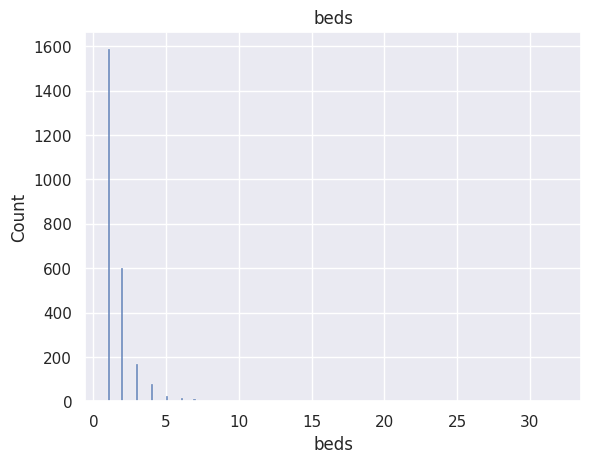

Kurtoza: 175.51696982731266
Skośność: 8.783840074690342


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

col = 'beds'
data = df[col]

sns.histplot(data)
plt.title(col)
plt.xlabel(col)
plt.show()

kurtosis_value = data.kurtosis()
skewness_value = data.skew()

print(f'Kurtoza: {kurtosis_value}')
print(f'Skośność: {skewness_value}')

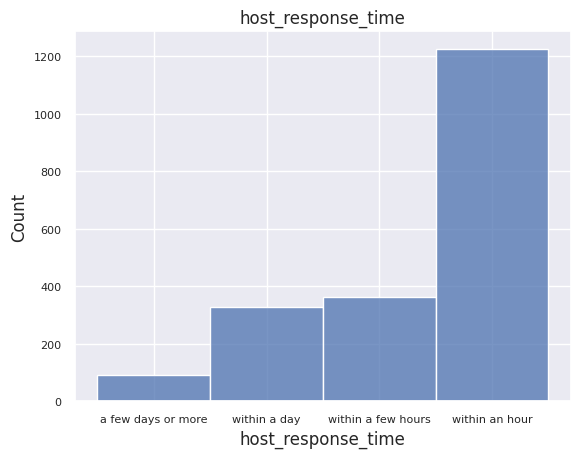

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

col1 = 'host_response_time'
data1 = df[col1]

sns.histplot(data1)
plt.title(col1)
plt.xlabel(col1)
plt.tick_params(axis='both', which='major', labelsize=8)
plt.show()



Kolumny, które miały większość brakujących wartości zostały już usunięte na początku projektu. Teraz uzupełnimy brakujące wartości tam gdzie to ma sens. Dla zmiennych numerycznych - uzupełnimy średnią. Dla kategorycznych - modą.

In [ ]:
fill_mean = lambda col: col.fillna(col.mean())
df['host_response_rate'] = fill_mean(df['host_response_rate'])
df['host_acceptance_rate'] = fill_mean(df['host_acceptance_rate'])
df['beds'] = fill_mean(df['beds'])
df['first_review'] = fill_mean(df['first_review'])
df['last_review'] = fill_mean(df['last_review'])
df['review_scores_rating'] = fill_mean(df['review_scores_rating'])
df['review_scores_accuracy'] = fill_mean(df['review_scores_accuracy'])
df['review_scores_cleanliness'] = fill_mean(df['review_scores_cleanliness'])
df['review_scores_communication'] = fill_mean(df['review_scores_communication'])
df['review_scores_location'] = fill_mean(df['review_scores_location'])
df['review_scores_value'] = fill_mean(df['review_scores_value'])
df['reviews_per_month'] = fill_mean(df['reviews_per_month'])
df['bathrooms'] = fill_mean(df['bathrooms'])
df['review_scores_checkin'] = fill_mean(df['review_scores_checkin'])
df['bedrooms'] = fill_mean(df['bedrooms'])


In [ ]:
fill_mode = lambda col: col.fillna(col.mode().iloc[0])
df['host_response_time'] = fill_mode(df['host_response_time'])

In [ ]:
missing_values = df.isnull().sum()
missing_values[missing_values != 0]

description        45
host_location     442
bathrooms_text      2
dtype: int64

Przycięcie odstających wartości w kolumnach maximum_maximum_nights i maximum_nights_avg_ntm.

Widzimy, że w tego typu kolumnach z reguły maksymalna wartość to 1125. Odrzucimy więc wiersze, w których jest ona przekroczona.

In [ ]:
df = df[df['maximum_maximum_nights'] <= 1125]
df = df[df['maximum_nights_avg_ntm'] <= 1125]

Poprawione tabela ze statystykami:

In [ ]:
columns = df.select_dtypes(include=['int', 'float']).drop(columns=['host_id', 'latitude', 'longitude'])
def percentile_25(x):
    return np.percentile(x, 25)
def percentile_75(x):
    return np.percentile(x, 75)

pd.options.display.float_format = '{:.2f}'.format
statisticsx = pd.DataFrame({
    'min': columns.min(),
    'max': columns.max().round(2),
    'mean': columns.mean(),
    'median': columns.median(),
    'percentile_25': columns.apply(percentile_25),
    'percentile_75': columns.apply(percentile_75),
    'std': columns.std(),
    'missing values' : columns.isnull().sum()
})
statisticsx

,min,max,mean,median,percentile_25,percentile_75,std,missing values
host_response_rate,0.00,1.00,0.92,1.00,0.92,1.00,0.18,0
host_acceptance_rate,0.00,1.00,0.78,0.88,0.70,0.99,0.28,0
host_listings_count,1.00,2559.00,24.97,2.00,1.00,14.00,76.18,0
host_total_listings_count,1.00,5354.00,30.96,3.00,1.00,19.00,123.76,0
accommodates,1.00,16.00,2.74,2.00,2.00,4.00,1.54,0
bedrooms,1.00,32.00,1.42,1.43,1.00,1.43,0.90,0
beds,1.00,32.00,1.59,1.00,1.00,2.00,1.20,0
price,22.00,9840.00,186.83,132.00,90.00,199.00,269.92,0
minimum_nights,1.00,1125.00,9.60,3.00,1.00,7.00,44.97,0
maximum_nights,1.00,1125.00,547.22,365.00,60.00,1125.00,477.06,0


In [ ]:
import pandas as pd

columns_category = df.select_dtypes(include='category')

def count_categories(col):
    value_counts = col.value_counts()
    return {k: v for k, v in value_counts.items()}

statistics2 = pd.DataFrame({
    'category : occurrence' : columns_category.apply(count_categories),
    'most_frequent' : columns_category.mode().iloc[0],
    'frequency' : columns_category.apply(lambda col: col.value_counts(normalize=True).max()),
    'count' : columns_category.apply(lambda col: col.value_counts().max()),
    'missing_values' : columns_category.isnull().sum()
})

statistics2

,category : occurrence,most_frequent,frequency,count,missing_values
source,"{'city scrape': 1941, 'previous scrape': 584}",city scrape,0.77,1941,0
host_response_time,"{'within an hour': 1744, 'within a few hours':...",within an hour,0.69,1744,0
neighbourhood_cleansed,"{'Langstrasse': 189, 'Sihlfeld': 167, 'Altstet...",Langstrasse,0.07,189,0
room_type,"{'Entire home/apt': 1872, 'Private room': 626,...",Entire home/apt,0.74,1872,0


# Zależności między zmiennymi


Podpunkt 9 projektu.

<Axes: >

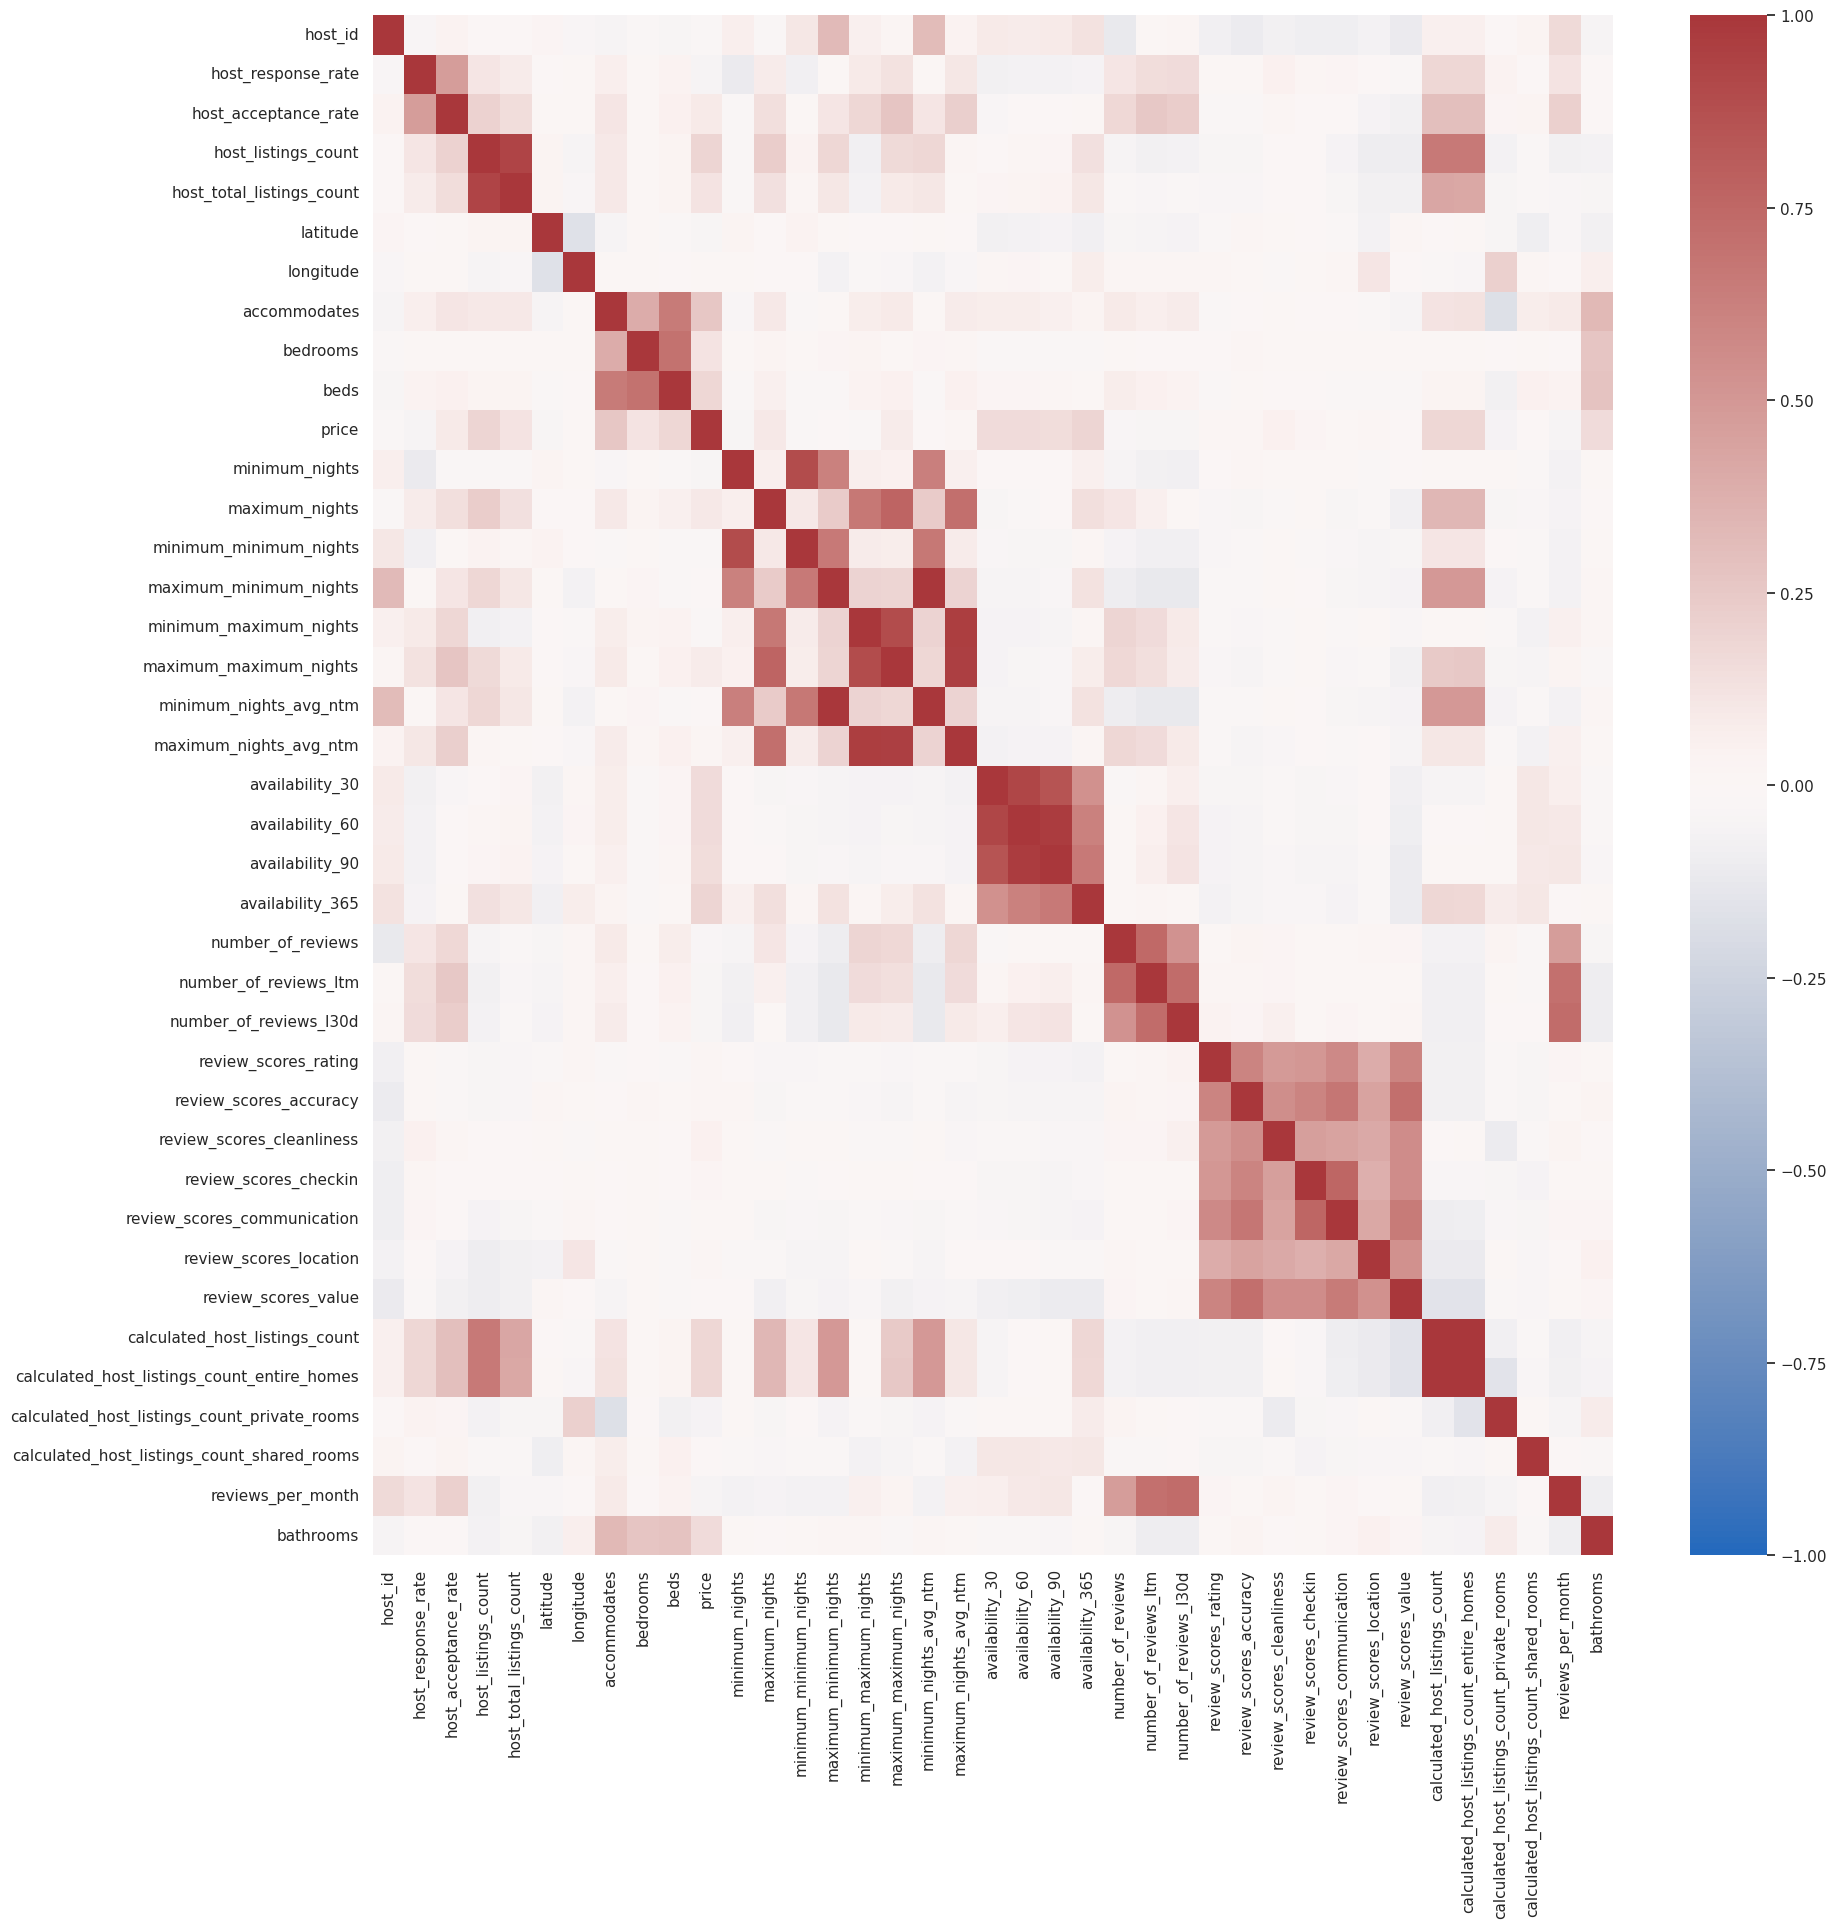

In [ ]:
sns.set()
corr = df.select_dtypes(include='number').corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr, annot=False, cmap='vlag', vmin=-1, vmax=1)

Heatmapa korelacji ta jest jednak bardzo nieczytelna, użycie wszystkich kolumn nie ma tutaj raczej większego sensu. Proponuję zatem użycie następujących kolumn:

<Axes: >

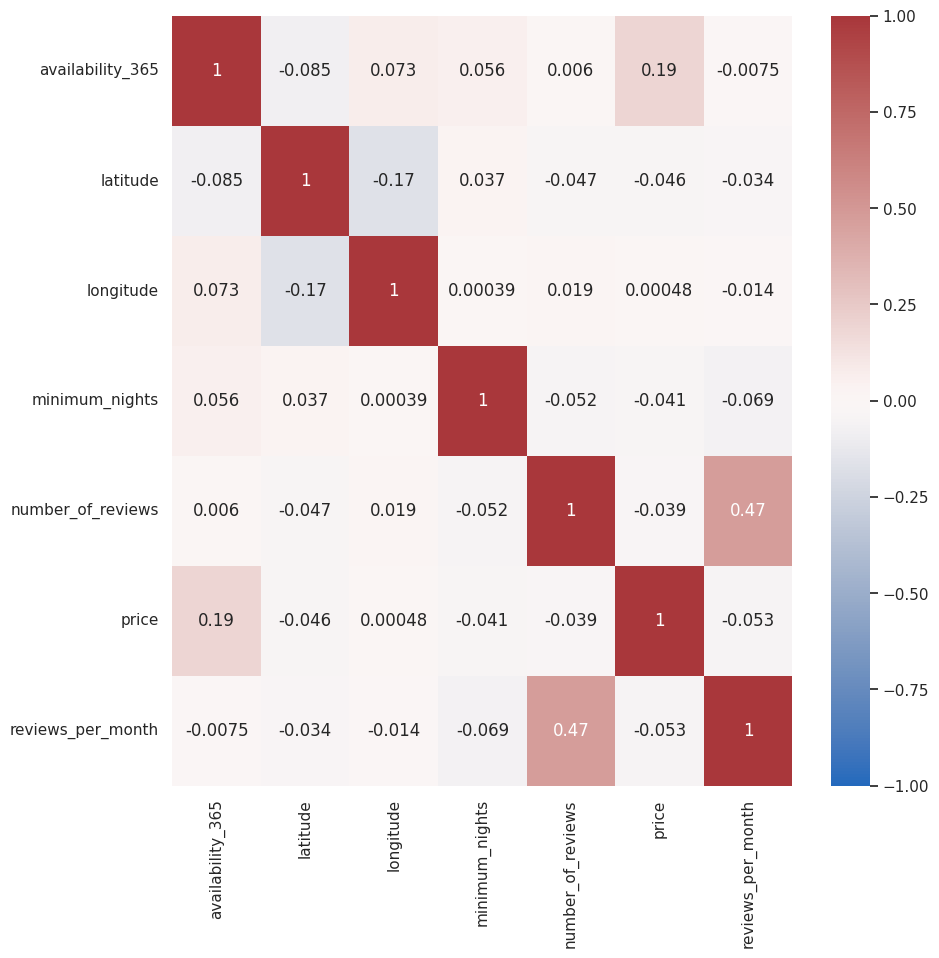

In [ ]:
cols = ['availability_365', 'latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 'price', 'reviews_per_month']
anotherdf = df[cols]
corr1 = anotherdf.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr1, annot=True, cmap='vlag', vmin=-1, vmax=1)

Przedstawimy korelacje między tymi wybranymi zmiennymi a ceną za pomocą scatter plots:

<Axes: xlabel='availability_365', ylabel='price'>

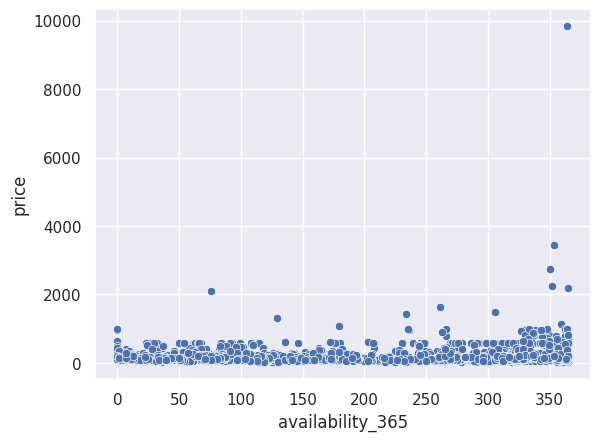

In [ ]:
sns.scatterplot(data=anotherdf, x="availability_365", y="price")

<Axes: xlabel='latitude', ylabel='price'>

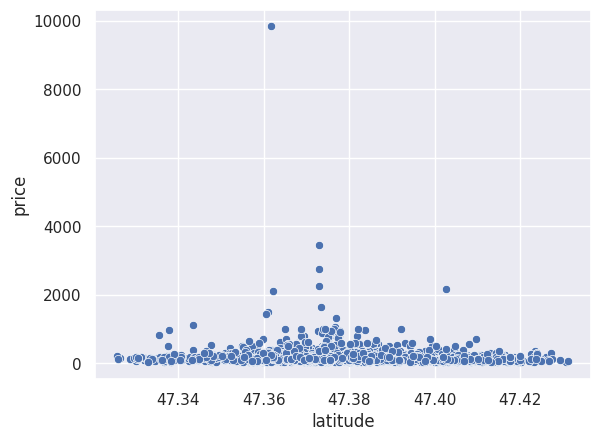

In [ ]:
sns.scatterplot(data=anotherdf, x="latitude", y="price")

<Axes: xlabel='longitude', ylabel='price'>

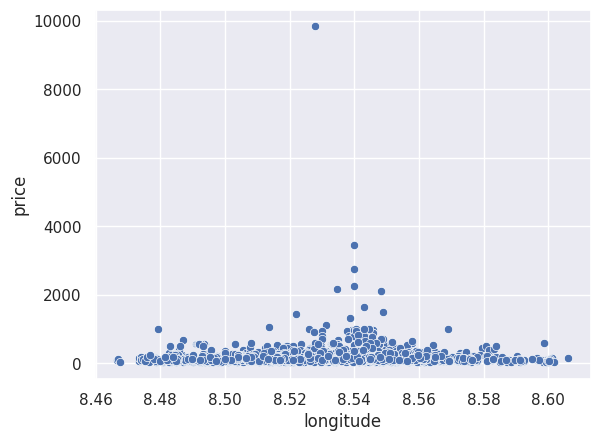

In [ ]:
sns.scatterplot(data=anotherdf, x="longitude", y="price")

<Axes: xlabel='minimum_nights', ylabel='price'>

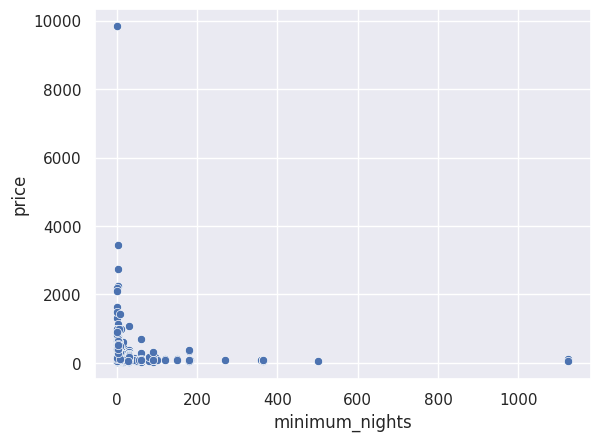

In [ ]:
sns.scatterplot(data=anotherdf, x="minimum_nights", y="price")

<Axes: xlabel='number_of_reviews', ylabel='price'>

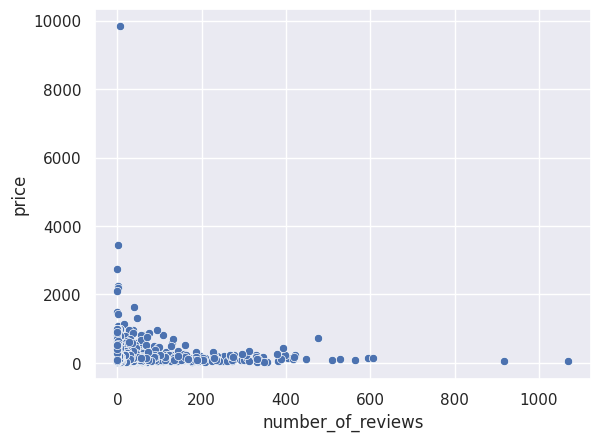

In [ ]:
sns.scatterplot(data=anotherdf, x="number_of_reviews", y="price")

<Axes: xlabel='reviews_per_month', ylabel='price'>

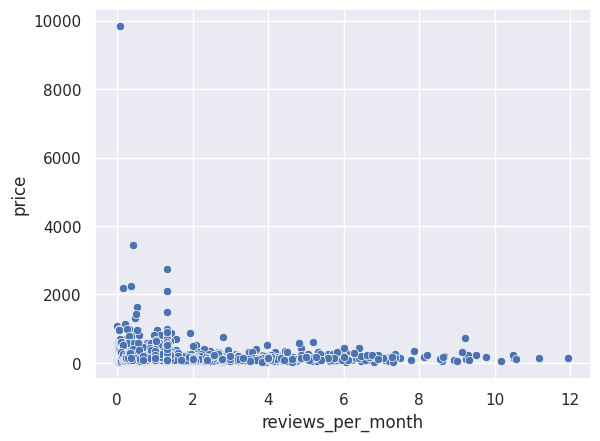

In [ ]:
sns.scatterplot(data=anotherdf, x="reviews_per_month", y="price")